## Twitter Stock Market Analysis using Python

Twitter started its journey in the stock market in 2013. So to analyze the complete timeline of Twitter in the stock market, we need the stock price data of Twitter from 2013 to 2022. I found a dataset that contains the data we need for this task.

Now let’s start with the task of Twitter Stock Market Analysis by importing the necessary Python libraries and the dataset:

In [1]:
import pandas as pd
import datetime
from datetime import date, timedelta
import plotly.graph_objects as go
import plotly.express as px
import plotly.io as pio

pio.templates.default = "plotly_white"

In [2]:
data = pd.read_csv("datasets/TWTR.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2013-11-07,45.099998,50.090000,44.000000,44.900002,44.900002,117701670.0
1,2013-11-08,45.930000,46.939999,40.685001,41.650002,41.650002,27925307.0
2,2013-11-11,40.500000,43.000000,39.400002,42.900002,42.900002,16113941.0
3,2013-11-12,43.660000,43.779999,41.830002,41.900002,41.900002,6316755.0
4,2013-11-13,41.029999,42.869999,40.759998,42.599998,42.599998,8688325.0


The dataset contains data about:

1. Date
2. The opening Price of the day
3. The highest price of the day
4. The lowest price of the day
5. The closing price of the day
6. The adjusted closing price of the day
7. The total number of shares traded in the day (volume)

Let’s have a look at the column insights:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2264 entries, 0 to 2263
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       2264 non-null   object 
 1   Open       2259 non-null   float64
 2   High       2259 non-null   float64
 3   Low        2259 non-null   float64
 4   Close      2259 non-null   float64
 5   Adj Close  2259 non-null   float64
 6   Volume     2259 non-null   float64
dtypes: float64(6), object(1)
memory usage: 123.9+ KB


The Date column is an object in this dataset. We will convert it into a datetime data type later. Now, let’s have a look at whether this dataset contains any null values or not:

In [4]:
data.isnull().sum()

Date         0
Open         5
High         5
Low          5
Close        5
Adj Close    5
Volume       5
dtype: int64

There are five null values in each column except the date column. Let’s remove the rows with null values and move further:

In [5]:
data.dropna(inplace=True)

Now let’s have a look at the stock prices of Twitter over the years:

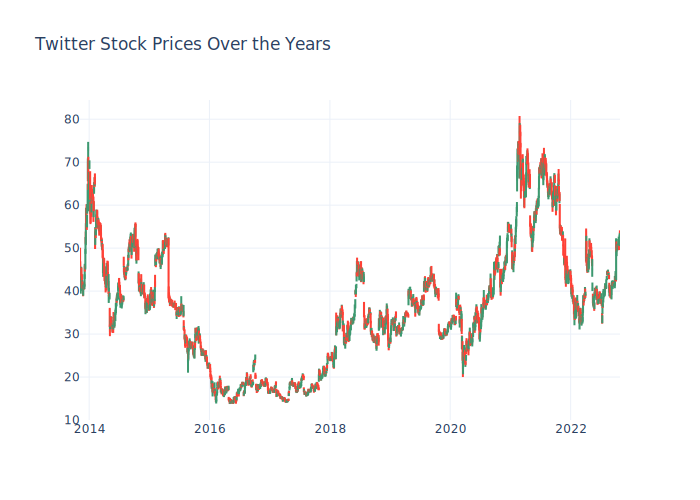

In [6]:
figure = go.Figure(
    data=[
        go.Candlestick(
            x=data["Date"],
            open=data["Open"],
            high=data["High"],
            low=data["Low"],
            close=data["Close"],
        )
    ]
)
figure.update_layout(
    title="Twitter Stock Prices Over the Years", xaxis_rangeslider_visible=False
)
figure.show("svg")

So since the introduction of Twitter in the stock market, it was only profitable at the beginning and 2021. Let’s visualize a bar chart to analyze the stock prices of Twitter in detail:

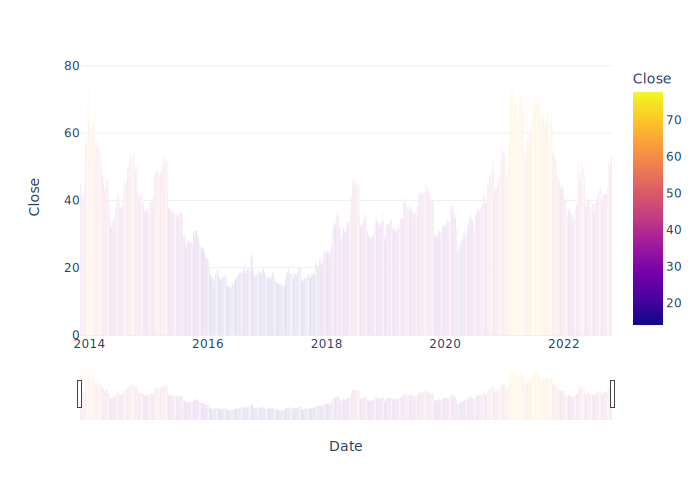

In [7]:
figure = px.bar(data, x="Date", y="Close", color="Close")
figure.update_xaxes(rangeslider_visible=True)
figure.show("svg")

Using the range slider, we can see that the first quarter of 2021 was the best time period for Twitter over the years in the stock market. We can also assign buttons to control time periods. Let’s add buttons to analyze the stock prices of Twitter in different time periods:

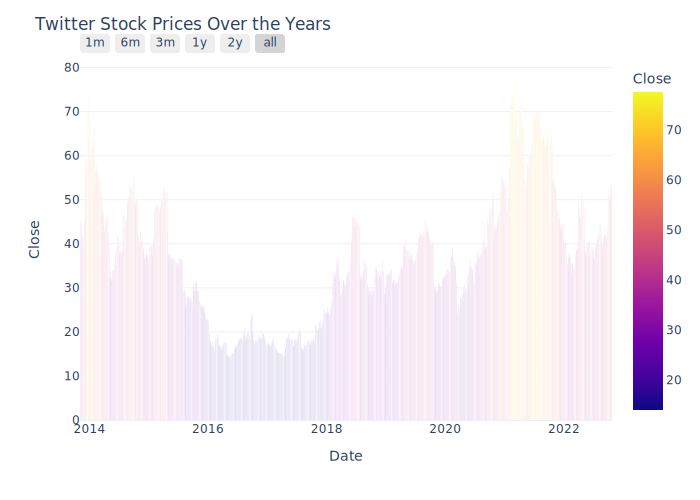

In [8]:
figure = px.bar(data, x="Date", y="Close", color="Close")
figure.update_xaxes(rangeslider_visible=True)
figure.update_layout(
    title="Twitter Stock Prices Over the Years", xaxis_rangeslider_visible=False
)
figure.update_xaxes(
    rangeselector=dict(
        buttons=list(
            [
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=3, label="3m", step="month", stepmode="backward"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(count=2, label="2y", step="year", stepmode="backward"),
                dict(step="all"),
            ]
        )
    )
)
figure.show("svg")

Now let’s have a look at the complete timeline of Twitter in the stock market:

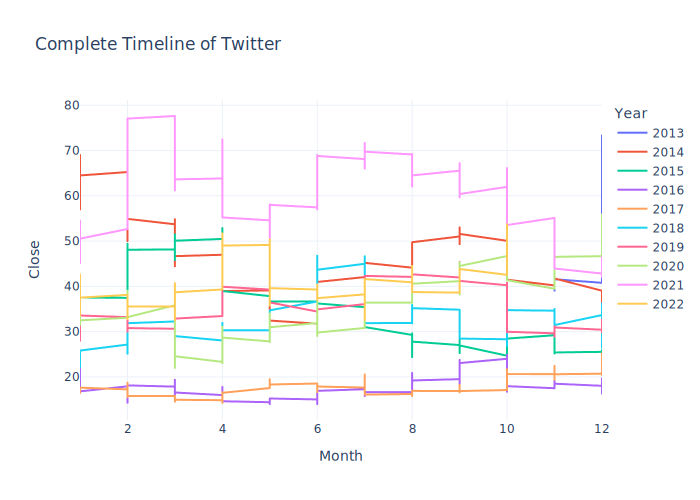

In [9]:
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data["Year"] = data["Date"].dt.year
data["Month"] = data["Date"].dt.month
fig = px.line(
    data, x="Month", y="Close", color="Year", title="Complete Timeline of Twitter"
)
fig.show("svg")

So since the introduction of Twitter in the stock market, 2014 went well for Twitter in the first four years. 2016 and 2017 were the worst for Twitter in the stock market. Its stock prices went up in 2018, 2019, and 2020. And then came 2021, the best year for Twitter in the stock market. Twitter reached its highest-ever stock price in the year 2021. But the stock prices of Twitter went down again in 2022.

## Summary

Twitter is a popular social media application and is still getting more popular after Elon Musk took over Twitter. But it never was among the best-performing companies in the stock market.